# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Студент гр. 9383 Хотяков Евгений

Вариант: 109

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод
Бинарный метод - метод возведения в степень, который позволяет возводить любое число в натуральую степень. Основной идеей метода является разбиение искомого числа ${x^n}$ на произведение ${x}$ в некоторых степенях. Алгоритм работает следующим образом:
- Слева направо просматривается бинарная запись числа ${n}$ без первого бита, так как он всегда равен 1.
- Если текущий бит - это ${1}$, то текущее число возводится в квадрат, после чего еще раз умножается на ${x}$.
- Если текущий бит - это ${0}$, то текущее число возводится в квадрат.

Количество операций умножения вычисляется по формуле: ${\lambda (n) + \nu (n) - 1}$, где ${\lambda (n) = \left \lfloor lb(n) \right \rfloor}$, а ${\nu(n)}$ - вес Хэмминга для бинарного представления числа ${n}$.

### Метод множителей

Метод множителей - метод, который также служит для возведения числа в натуральную степень и базируется на вышеописанном (бинарном) методе. Дано число ${x}$ и натуральная степень ${n}$, в которую это число предстоит возвести. Данный алгоритм работает следующим образом:
- Находим такое число ${i}$, которое является наименьшим простым множителем числа ${n}$.
- Вычисляем число ${j}$, такое что: ${i*j=n}$.
- Возодим число ${x}$ в полученную ранее степень ${i}$, затем полученное число возводим в степень ${j}$.
- Если число ${n}$ - простое, то сначала вычисляется ${x^{-1}}$, которое после домножается на ${x}$.

Допустим, что возможно посчитать ${x^i}$ за ${m}$ операций, а ${y^j}$ за ${k}$ операций, где ${y = x^i}$. Тогда можно утверждать, что ${x^{i \cdot j}}$ можно посчитать за ${(m + k)}$ операций.

### Аддитивная цепочка
Аддитивная цепочка — это последовательность натуральных чисел ${a_0, a_1, a_2, ..., a_m = n}$, в которой первый элемент всегда равен ${1}$, а каждый последующий элемент является суммой каких-то двух предыдущих элементов. То есть:
- ${a_0 = 1}$ 
- ${\forall i > 0, a_i = a_j + a_k , j,k < i}$ - шаг аддитивной цепочки.

Различают следующие виды шагов:
- ${i}$-шаг - удвоение, если ${j = k = i - 1}$
- ${i}$-шаг - звездный, если ${j = i - 1}$, ${k = \overline{0 .. (i-1)}}$
- ${i}$-шаг - малый, если ${\lambda(a_i) = \lambda(a_{i-1})}$

### Алгоритм Брауэра
Алгоритм Брауэра способен вычислить ${a^n}$ за ${lb(n) + \frac{(1 + \mathcal{O}(1)) * lb(n)}{lb(lb(n))}}$ операций.

Для этого используются цепочки Брауэра для числа ${n}$ и выбранный вручную параметр ${k}$:

${B_k(n) = \begin{cases}
1, 2, 3, ..., 2^k - 1 & \text{ if } n < 2^k \\ 
B_k(q), 2q, 4q, ..., 2^k q, n & \text{ if } n \geq 2^k, q = \left \lfloor \frac {n}{2^k} \right \rfloor
\end{cases}}$

Говоря иначе, число ${n}$, представляется в следующем виде:

${n = \sum_{i=0}^{j} a_i  2^{ik}, a_j \ne 0}$

Тогда длина соответствующей цепочки будет вычислена по следующему принципу:

${l_B(n) = j(k+1) + 2^k - 2, jk \leq lbn < (j+1)k}$ для ${k \sim lb(lb(n)) - 2lb(lb(lb(n)))}$

Данный алгоритм работает следующим образом:
- На вход получаем числа n, k.
- Производдится вычисление вспомогательных величин. ${d := 2^k, q_1 = \left [ \frac{n}{d} \right ], r_1 = n \% d}$, то есть ${n = q_1 d + r_1, 0 \leq r_1 < d}$
- Производится подсчет следующей величины: ${q_2 = \left [ \frac{q_1}{d} \right ], r_2 = q_1 \%d \Leftrightarrow q_1 = q_2 d + r_2}$
- Повторяем действия пока не получим ${q_s < d \Rightarrow q_{s-1} = q_s d + r_s}$ 

Результат будет выглядеть следующим образом: ${n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^kq_s + r_s)...) + r_2) + r_1}$

Далее рассмотрим тривиальную Брауэровскую цепочку ${B_k(n) = 1, 2, 3, ..., 2^k -1}$ и будем ее дополнять:
${B_k(n) = 1, 2, 3, ..., 2^k - 1, 2q_s, 4q_s, 8q_s,..., 2^k q_s, 2^k q_s + r_s, ..., n}$

Данный алгоритм имеет ряд оптимизаций:
- В случае ${n < 2^k}$ достаточно цепочки ${\left\{ 1, 2, 3, ..., b\right\}}$, где ${b = \max\left\{q_s, r_i\right\}}$ ${i = \overline{1..s}}$.
- Можно опускать операции, в которых ${r_i = 0}$.

### Звездная цепочка
Звездная цепочка - это такая аддитивная цепочка, которая вклячает в себя только звездные шаги. Подробнее данный шаг был описан выше.

### Алгоритм дробления вектора индексов
Алгоритм дробления вектора индексов используется для нахождения минимальной звездной цепочки для числа ${n}$.

Пусть у нас есть звездная цепочка ${a_i}$, длины ${l(n) = m-1}$.

Тогда для каждой такой звездной цепочки мы можем задать вектор индексов следующего вида:

${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leq x \leq i\right\}}$. 

Тогда можно записать шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Для поиска минимальной звездной цепочки используется перебор. Если осуществлять его без оптимизаций, то число операций будет равно ${(m-1)!}$, что очень много. 

Для уменьшения числа операций разделим наш вектор индексов на две части:  фиксированную и остаток, который может меняться: 

${\left\{r_i\right\}_{i=1}^q \cup \left\{\rho_i\right\}_{j=q+1}^m}$, где ${\rho_{j} = \left\{ x : 1 \leq x \leq j \right\}}$.

Стоит отметить, что наибольший ${a_m}$ мы получем в цепочке вида:

${\left\{r_i\right\}_{i=1}^q \cup \left\{q+1, q+2, ..., m\right\}}$

Тогда наименьший:

${\left\{r_i\right\}_{i=1}^q \cup \left\{1, 1,..., 1\right\}}$. 

Соответственно, получаем формулы:
- ${a_{max} = a_{q+1} \cdot 2^{m-q}}$
- ${a_{min} = a_{q+1} + m - q}$

После рассчета вышеупомянутых значений проводится проверка: 
- Если ${n<a_{min}}$ или ${n>a_{max}}$, то разбиение меняется.
- Если ${n \in [a_{min}, a_{max}]}$, то происходит перебор меняющегося вектора.
- Если ${n=a_m}$, то задача считается решенной и алгоритм прекращает работу.
- Если ${\{\rho_j\}}$ исчерпан, то происходит переход к следующему набору ${\{r_i\}}$.
- Если и ${\{\rho_j\}}$ и ${\{r_i\}}$ исчерпаны, то увеличиваем длину аддитивной цепочки на 1.

### Теорема Брауэра
Теорема гласит: при некотором ${k < lb(lb(n))}$ справедливо следующее неравенство ${l(n) < (1 + k^{-1})\left \lceil lb(n) \right \rceil + 2^{k-1} - k + 2}$.

#### Следствие 1
Если ${k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))}$, то ${\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1}$

#### Следствие 2
Наименьшая верхняя оценка: ${\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{\mathcal{O}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^2}}$

### Гипотеза Шольца-Брауэра
Гипотеза гласит: ${l^*(2^n-1) \leq l^*(n)+n-1}$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для ${x^n}$, где ${n >= 30}$, для 2-3 значений ${n}$ (значения ${n}$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра ${k}$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при ${n>500}$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить теорему Брауэра для ${n=1..200}$ путём построения функции ${l(n)}$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для ${1\leq n \leq 10}$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: предложить собственные модификации алгоритмов и реализовать их.

## Выполнение лабораторной работы

### Вычисление степеней бинарным методом и методом множителей

#### Бинарный метод

In [1]:
def binaryMethod(x, n):
    
    counter = 0
    x_tmp = x
    bin_tmp = bin(n)[3:]
    
    for i in bin_tmp:
        counter += 1
        if (i == '1'):
            x_tmp = x_tmp**2
            x_tmp = x*x_tmp
            counter += 1
            
        else:
            x_tmp = x_tmp**2
            
    return (x_tmp, counter)

#### Метод множителей

In [2]:
import math

def minPrime(n):
    
    for i in range(2, int(math.sqrt(n)) + 1):
        if (n%i == 0):
            return i
        
    return 1

def coefMethod(x, n):
    
    min_prime = minPrime(n)
    x_tmp, counter_1 = binaryMethod(x, min_prime)
    result, counter_2 = binaryMethod(x_tmp, n // min_prime)
    
    return (result, counter_1 + counter_2)

#### Сравнение бинарного метода и метода множителей

In [3]:
x = 89
n = [35, 40, 55, 129, 221]

print("Рассматриваемое число:" + str(x))
print("")

for i in n:
    x_tmp_bn, counter_bn = binaryMethod(x,i) 
    x_tmp_cf, counter_cf = coefMethod(x,i)
    
    print("Степень:"+str(i))
    print("Кол-во операций бинарным методом = " + str(counter_bn))
    print("Кол-во операций методом множителей = " + str(counter_cf))
    print("")

Рассматриваемое число:89

Степень:35
Кол-во операций бинарным методом = 7
Кол-во операций методом множителей = 7

Степень:40
Кол-во операций бинарным методом = 6
Кол-во операций методом множителей = 6

Степень:55
Кол-во операций бинарным методом = 9
Кол-во операций методом множителей = 8

Степень:129
Кол-во операций бинарным методом = 8
Кол-во операций методом множителей = 10

Степень:221
Кол-во операций бинарным методом = 12
Кол-во операций методом множителей = 10



#### Вывод
Из полученных результатов видно, что в среднем метод множителей возводит число в заданную степень либо за то же количество операций, что и бинарный метод, либо за меньшее число. 

Для степеней вида ${n = 2^k + 1}$, бинарный метод оказывается быстрее.

### Метод дробления вектора индексов

#### Реализация

In [29]:
import time

def nextVector(vector, q=0):
    l = len(vector)
    if (vector == [1 for i in range(l)]):
        return [0 for i in range(l)]
    for i in range(l - 1, -1, -1):
        if (vector[i] == 1):
            vector[i] = i + 1 + q
            continue
        vector[i] -= 1
        break
        
    return vector

def makeChain(ind):
    
    chain = [1]
    
    for i in ind:
        chain.append(chain[-1] + chain[i-1])
        
    return chain

def indexVectorFraction(n):
    
    for m in range(int(math.log(n, 2)), int(math.log(n, 2)) + bin(n)[3:].count('1') + 1):
        q = m // 2
        
        if (q == 0):
            q = 1
        
        array_r = [i for i in range(1, q+1)]
        array_rho = [q + i + 1 for i in range(m - q)]
        
        while (array_r != [0 for i in range(q)]):
            chain = makeChain(array_r + array_rho)
            a_min = chain[q] + (m - q)
            a_max = chain[q] * 2 ** (m - q)
            
            if ((n < a_min) or (n > a_max)):
                array_r = nextVector(array_r)
                continue
                
            if (chain[-1] == n):
                return chain
            
            while (array_rho != [0 for i in range(m - q)]):
                chain = makeChain(array_r + array_rho)
                
                if (chain[-1] == n):
                    return chain
                
                array_rho = nextVector(array_rho, q)
                
            array_r = nextVector(array_r)
            array_rho = [q + i + 1 for i in range(m - q)]
            
    return chain

def contTime(n):
    start = time.time()
    answer = indexVectorFraction(n)
    end = time.time()
    return (answer, end-start)

#### Пример работы программы

In [31]:
n = [517, 665]
result = []
for i in n:
    answer, timer = contTime(i)
    result.append([i, len(answer), timer, answer])

for i in range(len(n)):
    print("N: " + str(result[i][0]))
    print("L: " + str(result[i][1]))
    print("Time " + str(result[i][2]))
    print("Chain " + str(result[i][3]))
    print("")

N: 517
L: 12
Time 2.2628939151763916
Chain [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 516, 517]

N: 665
L: 13
Time 109.74054050445557
Chain [1, 2, 4, 8, 16, 32, 64, 128, 136, 264, 528, 664, 665]



#### Вывод
Из полученных результатов можно сделать выводы о том, что хоть алгоритм и находит минимальную аддитивную цепочку, но при больших ${n}$ затрачивает огромное количество времени, ввиду своей переборности.

### Алгоритм Брауэра

#### Реализация

In [9]:
def auxiliary(n, k):
    
    d = 2**k
    array_q = []
    array_r = []
    array_q.append(n // d)
    array_r.append(n % d)
    
    while (array_q[-1] >= d):
        array_r.append(array_q[-1] % d)
        array_q.append(array_q[-1] // d)
    
    array_r.append(array_q[-1] % d)
    return (array_q, array_r)

def BrauerChain(n, k, array_chain, array_q, array_r, index = 0):
    
    if (n < 2**k):
        for i in range(1, max(array_q[-1], max(array_r)) + 1):
            array_chain.append(i)
    
    else:
        q = array_q[index]
        index += 1
        tmp_q = q
        BrauerChain(q, k, array_chain, array_q, array_r, index)
        for i in range(k):
            tmp_q *=2
            array_chain.append(tmp_q)
            
        if (n != tmp_q):    
            array_chain.append(n)
            
    return array_chain

#### Пример работы программы

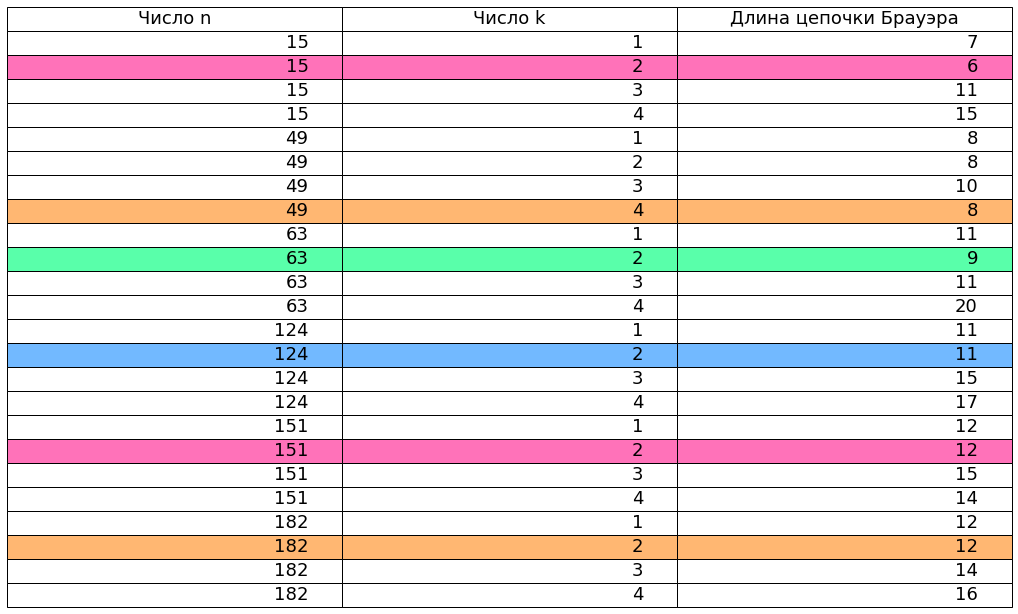

In [10]:
import matplotlib.pyplot as plt
n_arr = [15, 49, 63, 124, 151, 182]
k_min_for_n = []

k = [1, 2, 3, 4]

columns = ("Число n", "Число k", "Длина цепочки Брауэра")

cell_text = []
cell_text2 = []
for i in range(len(n_arr)):
    k_min = 1
    min_oper = n_arr[i]
    min_chain = []
    for j in range(len(k)):
        q_arr, r_arr = auxiliary(n_arr[i], k[j])
        B_arr = BrauerChain(n_arr[i], k[j], [], q_arr, r_arr)
        if(len(B_arr) <= min_oper):
            min_oper = len(B_arr)
            k_min = j + 1
            min_chain = B_arr
        cell_text.append([n_arr[i], k[j], len(B_arr)])
        
    k_min_for_n.append(k_min)
    cell_text2.append([n_arr[i], len(indexVectorFraction(n_arr[i])), len(min_chain), k_min, min_chain,  ])
        
colors = []
color_palette = ["w", "w", "w", "w"]
color_accent = ["#ff72b9", "#ffb772", "#59ffaa", "#72b9ff"]
for i in range(len(n_arr)):
    for j in range(len(k)):
        if k[j] == k_min_for_n[i]:
            colors.append([color_accent[i % len(color_accent)], color_accent[i % len(color_accent)], color_accent[i % len(color_accent)]])
        else:
            colors.append([color_palette[i % len(color_palette)], color_palette[i % len(color_palette)], color_palette[i % len(color_palette)]])

table = plt.table(cellText=cell_text, cellColours=colors, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

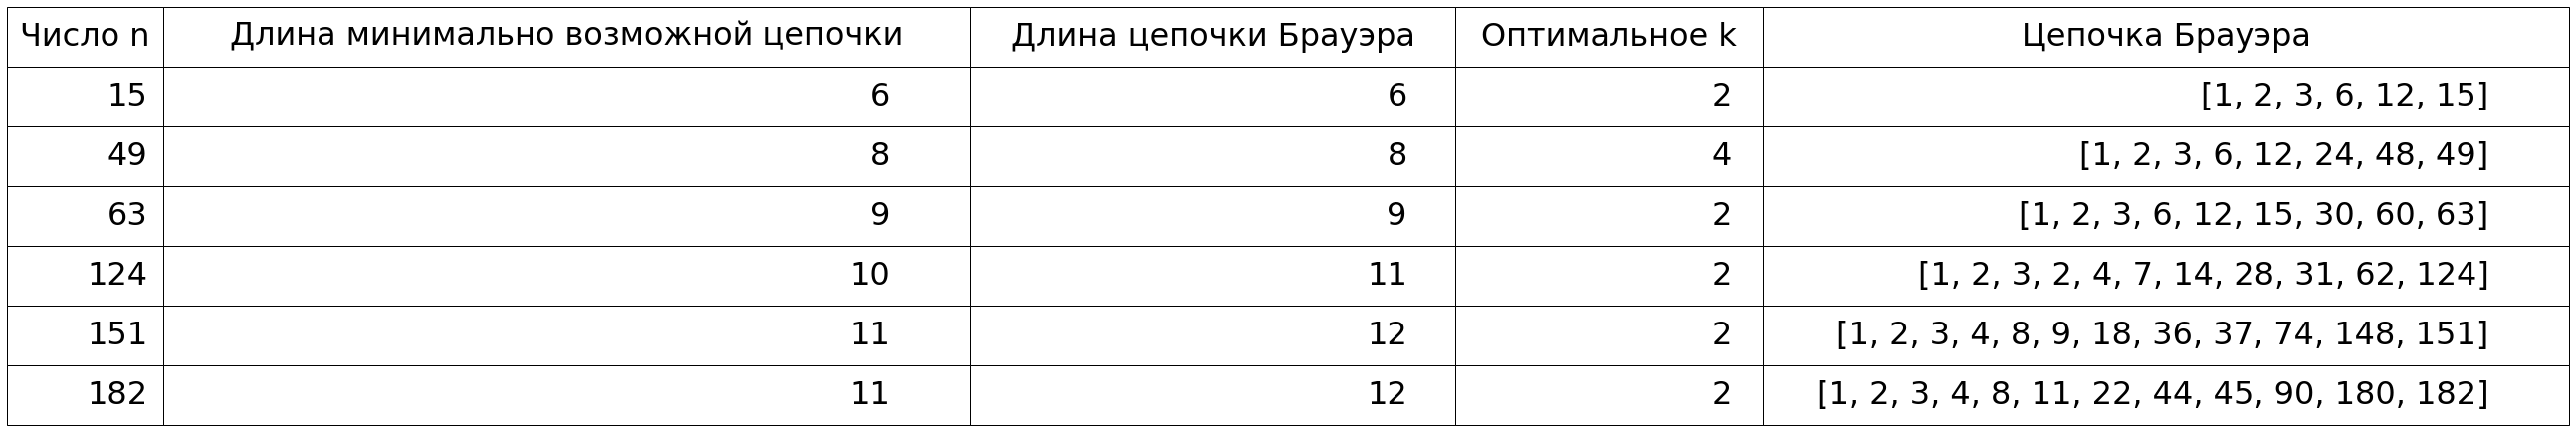

In [13]:
columns = ("Число n", "Длина минимально возможной цепочки", "Длина цепочки Брауэра", "Оптимальное k", "Цепочка Брауэра")
           
table = plt.table(cellText=cell_text2, colLabels=columns, loc='center')

table.set_fontsize(32)
table.scale(7, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text2))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

#### Вывод
Согласно полученным результатам можно сказать, что параметр k, влияет на длину получающейся цепочки Брауэра. Иногда алгоритм Брауэра выдает минимальную по длине цепочку, но далеко не всегда, а значит алгоритм Брауэра не гарантирует минимальность длины цепочки.

### Проверка следствия 1 из теоремы Брауэра

#### Реализуемые формулы

Мы будем строить функцию ${y=b+a*ln(x)}$, где ${a}$ и ${b}$ - коэфиициенты, вычисляющиеся по следующим формулам:

${a = \frac{n*\sum_{i=1}^{n}(y_i*ln(x_i))-\sum_{i=1}^{n}(y_i)*\sum_{i=1}^{n}(ln(x_i))}{n*\sum_{i=1}^{n}(ln(x_i)^2)-(\sum_{i=1}^{n}(ln(x_i)))^2}}$

${b = \frac{\sum_{i=1}^{n}(y_i)-b*\sum_{i=1}^{n}(ln(x_i))}{n}}$

#### Реализация

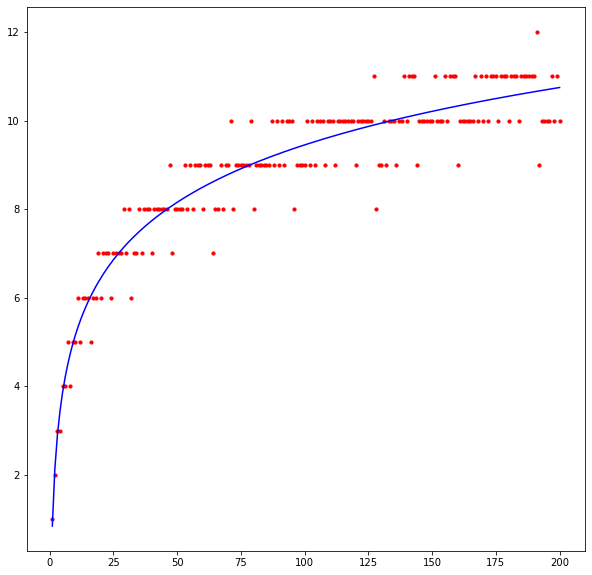

In [22]:
import matplotlib.pyplot as plt
import numpy as np

max_N = 201
dots = [1, 2, 3, 3, 4, 4, 5] + [len(indexVectorFraction(i)) for i in range(8, max_N)]

def aCoef(y):
    n = len(y)
    y = np.array(y)
    x = np.array(range(1, n + 1))
    log_x = np.log(x)
    numerator = n * np.sum(np.multiply(y, log_x)) - np.sum(y) * np.sum(log_x)
    down = n * np.sum(np.square(log_x)) - np.sum(log_x) * np.sum(log_x)
    return numerator / down

def bCoef(y, a):
    n = len(y)
    y = np.array(y)
    x = np.array(range(1, n + 1))
    log_x = np.log(x)
    numerator = np.sum(y) - a*np.sum(log_x)
    return numerator / n

def f(a, b, x):
    return a*np.log(x) + b

a = aCoef(dots)
b = bCoef(dots, a)
n = len(dots)
size = 10
plt.figure(figsize=(10, 10))
plt.scatter(range(1, n+1), dots, s=size, color="red")
plt.plot(range(1, n+1), f(a, b, range(1, n + 1)), color='blue')
plt.show()

#### Вывод
Из графика можно четко увидеть логарифмическую кривую, которая является аппроксимацией точек, которые построила функция ${l(n)}$. Из этого мы можем сделать вывод, что на бесконечности функции будут эквивалентны. Следствие доказано.

### Проверка гипотезы Шольца-Брауэра

#### Реализация

In [32]:
first = [len(indexVectorFraction(2**i - 1)) for i in range(2, 11)]
second = [len(indexVectorFraction(i)) + i - 1 for i in range(2, 11)]
result = []
for i in range(9):
    result.append([i + 2, first[i], second[i]])
for i in range(len(result)):
    print("N:" + str(result[i][0]))
    print("l(2^n-1):" + str(result[i][1]))
    print("l(n)+n-1:" + str(result[i][2]))
    print("")

N:2
l(2^n-1):3
l(n)+n-1:3

N:3
l(2^n-1):5
l(n)+n-1:5

N:4
l(2^n-1):6
l(n)+n-1:6

N:5
l(2^n-1):8
l(n)+n-1:8

N:6
l(2^n-1):9
l(n)+n-1:9

N:7
l(2^n-1):11
l(n)+n-1:11

N:8
l(2^n-1):11
l(n)+n-1:11

N:9
l(2^n-1):13
l(n)+n-1:13

N:10
l(2^n-1):14
l(n)+n-1:14



#### Вывод
Гипотеза Шольца-Брауэра для ${n \leq 10}$ верна.

## Общий вывод о проделанной работе
В ходе работы были изучены и применены на практике теоретические сведения об аддитивных цепочках и об алгоритмах нахождения аддитивных цепочек для заданного числа. Были реализованы следующие алгоритмы и методы:
- бинарный метод
- метод множителей
- алгоритм Брауэра 
- алгоритм дробления вектора индексов
Также в ходе работы были проверены на практике следствие 1 из теоремы Брауэра и гипотеза Шольца-Брауэра.